In [2]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Dropping Cabin and Ticket columns as they do not seem to provide enough info

In [4]:
train_df.drop(["Cabin","Ticket"],axis=1,inplace=True)
test_df.drop(["Cabin","Ticket"],axis=1,inplace=True)
combine = [train_df, test_df]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Converting object datatype to categorical

In [5]:
for d in combine:
    d["male"]=d["Sex"].map({"male": 1, "female": 0}).astype(int)
    d["female"]=d["Sex"].map({"male":0 , "female": 1}).astype(int)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   male         418 non-null    int64  
 10  female       418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [6]:
for d in combine:
    d["family"]=d["SibSp"]+d["Parch"]

In [7]:
for d in combine:
    d["Pclass"]=d["Pclass"].replace({1:3,2:2,3:1})

In [8]:
for d in combine:
    d["Southampton"] = d["Embarked"].apply(lambda x: 1 if(x == "S") else 0)
    d["Cherbough"] = d["Embarked"].apply(lambda x: 1 if(x == "C") else 0)
    d["Queenstown"] = d["Embarked"].apply(lambda x: 1 if(x == "Q") else 0)

In [9]:
for d in combine:
    d["Embarked"]=d["Embarked"].fillna("S")

In [10]:
for d in combine:
    d["Title"] = d["Name"].str.extract(pat = '([A-Za-z]+)\.')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,male,female,family,Southampton,Cherbough,Queenstown,Title
0,1,0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,1,1,0,0,Mr
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,1,1,0,1,0,Mrs
2,3,1,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,0,1,0,0,Miss
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,1,1,1,0,0,Mrs
4,5,0,1,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,0,1,0,0,Mr


Categorizing other object datatype to int

In [11]:
for d in combine:
    d["Age"] = d["Age"].fillna(0)
    for row in d.index:
        if(d.loc[row, "Age"] == 0.0):
            if(d.loc[row, "Title"] == "Miss"):
                if(d.loc[row, "Parch"] == 0):
                    d.loc[row, "Age"] = d[(d["Title"] == "Miss") & (d["Parch"] == 0)]["Age"].mean()

                elif(d.loc[row, "Parch"] != 0):
                    d.loc[row, "Age"] = d[(d["Title"] == "Miss") & (d["Parch"] != 0)]["Age"].mean()
            elif(d.loc[row, "Title"] == "Master"):
                d.loc[row, "Age"] = d[d["Title"] == "Master"]["Age"].mean()
            elif(d.loc[row, "Sex"] == "female"):
                if(d.loc[row, "Pclass"] == 1):
                    d.loc[row, "Age"] = d[(d["Sex"] == "female") & (d["Pclass"] == 1)]["Age"].mean()
                elif(d.loc[row, "Pclass"] == 2):
                    d.loc[row, "Age"] = d[(d["Sex"] == "female") & (d["Pclass"] == 2)]["Age"].mean()
                elif(d.loc[row, "Pclass"] == 3):
                    d.loc[row, "Age"] = d[(d["Sex"] == "female") & (d["Pclass"] == 3)]["Age"].mean()
            elif(d.loc[row, "Sex"] == "male"):
                if(d.loc[row, "Pclass"] == 1):
                    d.loc[row, "Age"] = d[(d["Sex"] == "male") & (d["Pclass"] == 1)]["Age"].mean()
                elif(d.loc[row, "Pclass"] == 2):
                    d.loc[row, "Age"] = d[(d["Sex"] == "male") & (d["Pclass"] == 2)]["Age"].mean()
                elif(d.loc[row, "Pclass"] == 3):
                    d.loc[row, "Age"] = d[(d["Sex"] == "male") & (d["Pclass"] == 3)]["Age"].mean()

In [12]:
for d in combine:
    d["Age_Band"] = pd.cut(d["Age"], 5)
    d["Age_Band"].unique()

In [13]:
for d in combine:
    d.loc[(d["Age"] <= 16.336), "Age"] = 5
    d.loc[((d["Age"] > 16.336) & (d["Age"] <= 32.252)), "Age"] = 2
    d.loc[((d["Age"] > 32.252) & (d["Age"] <= 48.168)), "Age"] = 3
    d.loc[((d["Age"] > 48.168) & (d["Age"] <= 64.084)), "Age"] = 4
    d.loc[(d["Age"] > 64.084), "Age"] = 1

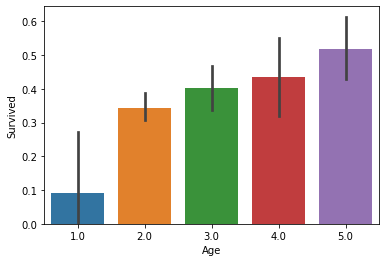

In [14]:
sns.barplot(train_df["Age"],train_df["Survived"])

As titles play an important role in deciding survival as saving life of important is prioritized.

In [15]:
for d in combine:
    d["Title"] = d["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    d["Title"] = d["Title"].replace(["Mlle", "Ms"], "Miss")
    d["Title"] = d["Title"].replace("Mme", "Mrs")
    d["Mr"] = d["Title"].apply(lambda x: 1 if(x == "Mr") else 0)
    d["Miss"] = d["Title"].apply(lambda x: 1 if(x == "Miss") else 0)
    d["Mrs"] = d["Title"].apply(lambda x: 1 if(x == "Mrs") else 0)
    d["Master"] = d["Title"].apply(lambda x: 1 if(x == "Master") else 0)
    d["Rare"] = d["Title"].apply(lambda x: 1 if(x == "Rare") else 0)


In [16]:
for d in combine:
    d["IsAlone"] = d["family"].apply(lambda x: 1 if(x != 0) else 0)

In [17]:
passid = test_df["PassengerId"]

In [18]:
for d in combine:
    d.drop(columns = ["Name", "Sex", "Embarked", "Age_Band", "Title", "SibSp", "Parch", "family", "PassengerId"], inplace = True)

In [19]:
for d in combine:
    d["Fare_Band"] = pd.qcut(train_df["Fare"],4)
    d["Fare_Band"].unique()

In [20]:
for d in combine:
    for row in d.index:
        if(d.loc[row, "Fare"] <= 7.91):
            d.loc[row, "Fare"] = 0
        elif((d.loc[row, "Fare"] > 7.91) & (d.loc[row, "Fare"] <= 14.454)):
            d.loc[row, "Fare"] = 1
        elif((d.loc[row, "Fare"] > 14.454) & (d.loc[row, "Fare"] <= 31)):
            d.loc[row, "Fare"] = 2
        else:
            d.loc[row, "Fare"] = 3
    d["Fare"] = d["Fare"].astype(int)

In [21]:
train_df

,Survived,Pclass,Age,Fare,male,female,Southampton,Cherbough,Queenstown,Mr,Miss,Mrs,Master,Rare,IsAlone,Fare_Band
0,0,1,2.0,0,1,0,1,0,0,1,0,0,0,0,1,"(-0.001, 7.91]"
1,1,3,3.0,3,0,1,0,1,0,0,0,1,0,0,1,"(31.0, 512.329]"
2,1,1,2.0,1,0,1,1,0,0,0,1,0,0,0,0,"(7.91, 14.454]"
3,1,3,3.0,3,0,1,1,0,0,0,0,1,0,0,1,"(31.0, 512.329]"
4,0,1,3.0,1,1,0,1,0,0,1,0,0,0,0,0,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,2.0,1,1,0,1,0,0,0,0,0,0,1,0,"(7.91, 14.454]"
887,1,3,2.0,2,0,1,1,0,0,0,1,0,0,0,0,"(14.454, 31.0]"
888,0,1,5.0,2,0,1,1,0,0,0,1,0,0,0,1,"(14.454, 31.0]"
889,1,3,2.0,2,1,0,0,1,0,1,0,0,0,0,0,"(14.454, 31.0]"


In [22]:
test_df

,Pclass,Age,Fare,male,female,Southampton,Cherbough,Queenstown,Mr,Miss,Mrs,Master,Rare,IsAlone,Fare_Band
0,1,3.0,0,1,0,0,0,1,1,0,0,0,0,0,"(-0.001, 7.91]"
1,1,3.0,0,0,1,1,0,0,0,0,1,0,0,1,"(31.0, 512.329]"
2,2,4.0,1,1,0,0,0,1,1,0,0,0,0,0,"(7.91, 14.454]"
3,1,2.0,1,1,0,1,0,0,1,0,0,0,0,0,"(31.0, 512.329]"
4,1,2.0,1,0,1,1,0,0,0,0,1,0,0,1,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,2.0,1,1,0,1,0,0,1,0,0,0,0,0,"(-0.001, 7.91]"
414,3,3.0,3,0,1,0,1,0,0,0,0,0,1,0,"(7.91, 14.454]"
415,1,3.0,0,1,0,1,0,0,1,0,0,0,0,0,"(7.91, 14.454]"
416,1,2.0,1,1,0,1,0,0,1,0,0,0,0,0,"(31.0, 512.329]"


In [23]:
X_train=train_df.drop(columns=['Survived','Fare_Band'])
X_test=test_df.drop(columns=['Fare_Band'])
y=train_df['Survived']

In [24]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
print(X_train.shape)
print(y.shape)
print(X_test.shape)
model_1.fit(X_train,y)
y_pred1=model_1.predict(X_test)
print(model_1.score(X_train,y))

(891, 14)
(891,)
(418, 14)
0.8159371492704826


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_2 = RandomForestClassifier()
model_2.fit(X_train, y)
y_pred2 = model_2.predict(X_test)
print(model_2.score(X_train,y))

0.8664421997755332


In [26]:
from sklearn.naive_bayes import GaussianNB
model_3=GaussianNB()
model_3.fit(X_train,y)
y_pred3 = model_3.predict(X_test)
print(model_3.score(X_train,y))

0.7934904601571269


In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_4 = KNeighborsClassifier()
model_4.fit(X_train,y)
y_pred4 = model_4.predict(X_test)
print(model_4.score(X_train,y))

0.7946127946127947


In [28]:
from sklearn.svm import SVC
model_5 = SVC()
model_5.fit(X_train,y)
y_pred5 = model_5.predict(X_test)
print(model_5.score(X_train,y))

0.8271604938271605


In [29]:
from sklearn.tree import DecisionTreeClassifier
model_6=DecisionTreeClassifier()
model_6.fit(X_train,y)
y_pred6 = model_6.predict(X_test)
print(model_6.score(X_train,y))

0.8664421997755332


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
model_7=GradientBoostingClassifier()
model_7.fit(X_train,y)
y_pred7 = model_7.predict(X_test)
print(model_7.score(X_train,y))

0.8395061728395061


In [31]:
from xgboost import XGBClassifier

model_8 = XGBClassifier()
model_8.fit(X_train, y)
y_pred8 = model_8.predict(X_test)
print(model_8.score(X_train, y))

0.8653198653198653


Creating different models and using ensembling to get the best result

In [32]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
count = 1
predict=[]
Model = {"Model_1" : XGBClassifier(), "Model_2" : LogisticRegression(), "Model_3" : KNeighborsClassifier(), "Model_4" : SVC(), "Model_5" : GradientBoostingClassifier()}
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train.loc[train_index], X_train.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    Model["Model_" + str(count)].fit(x_train, y_train)
    count = count + 1
pred=[]

In [33]:
pred_1 = Model["Model_1"].predict(X_train)
pred_2 = Model["Model_2"].predict(X_train)
pred_3 = Model["Model_3"].predict(X_train)
pred_4 = Model["Model_4"].predict(X_train)
pred_5 = Model["Model_5"].predict(X_train)
pred_11 = Model["Model_1"].predict(X_test)
pred_22 = Model["Model_2"].predict(X_test)
pred_33 = Model["Model_3"].predict(X_test)
pred_44 = Model["Model_4"].predict(X_test)
pred_55 = Model["Model_5"].predict(X_test)
Meta_pred = pd.DataFrame({
            "XG" : pred_1,
            "LR" : pred_2,
            "KN" : pred_3,
            "SVC" : pred_4,
            "GBC" : pred_5
            })
Meta_pred.head()

,XG,LR,KN,SVC,GBC
0,0,0,0,0,0
1,1,1,1,1,1
2,0,1,1,1,0
3,1,1,1,1,1
4,0,0,0,0,0


In [34]:
X_train['xg']=pred_1
#X_train['lr']=pred_2
X_train['kn']=pred_3
X_train['svc']=pred_4
X_train['gbc']=pred_5
X_test['xg']=pred_11
#X_test['lr']=pred_22
X_test['kn']=pred_33
X_test['svc']=pred_44
X_test['gbc']=pred_55
X_train

,Pclass,Age,Fare,male,female,Southampton,Cherbough,Queenstown,Mr,Miss,Mrs,Master,Rare,IsAlone,xg,kn,svc,gbc
0,1,2.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,3,3.0,3,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1
2,1,2.0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0
3,3,3.0,3,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1
4,1,3.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,2.0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
887,3,2.0,2,0,1,1,0,0,0,1,0,0,0,0,1,1,1,1
888,1,5.0,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
889,3,2.0,2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_2 = RandomForestClassifier()
model_2.fit(X_train, y)
y_pred2 = model_2.predict(X_test)
print(model_2.score(X_train,y))

0.8664421997755332


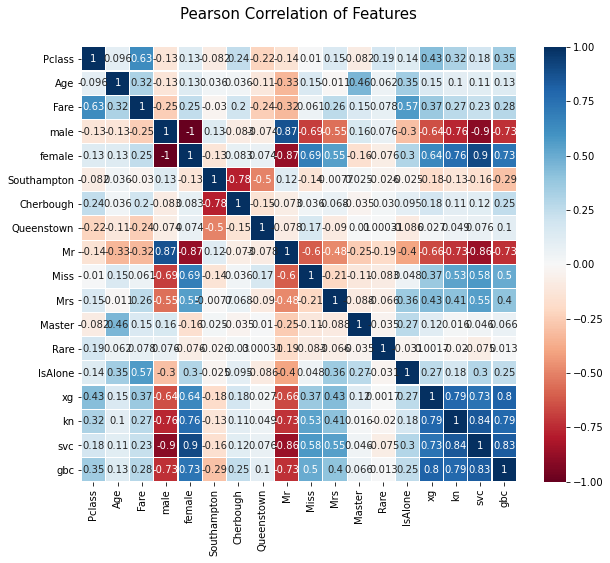

In [36]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [37]:
submission = pd.DataFrame({
        "PassengerId": passid,
        "Survived": y_pred2
    })
submission.to_csv('submission20.csv', index=False)